<a href="https://colab.research.google.com/github/MarianaLimaAlmeida/Otimizacao/blob/master/Pinch_Mariana_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Tecnologia Pinch**

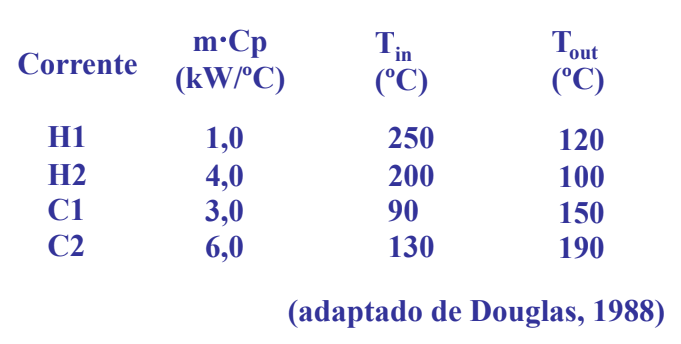

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Input de dados**

**Inserindo o approach mínimo e os dados das correntes frias e quentes**

In [81]:
app = 10 

In [82]:
taxa_cp_h = np.array((1,4)) # kW/C
t_entrada_h = np.array((250,200)) # ºC
t_saida_h = np.array((120,100)) # ºC
nome_linha_h = np.array(("H1","H2"))

In [83]:
taxa_cp_c = np.array((3,6)) # kW/C
t_entrada_c = np.array((90,130)) # ºC
t_saida_c = np.array((150,190)) # ºC
nome_linha_c = np.array(("C1","C2"))

# **Teste opcional com outros dados**

*Este script foi desenvolvido de forma que é livre a escolha do número de correntes frias e quentes.*

*Ele funcionará para qualquer quantitativo, desde que sejam inseridos de forma separada no input, correntes quentes em um e correntes quentes em outro texto em itálico*

In [84]:
# #testando
# app = 20

# taxa_cp_h = np.array((10,10,80,12.5)) # kW/C
# t_entrada_h = np.array((261,199,123,151)) # ºC
# t_saida_h = np.array((158,70,52,67)) # ºC
# nome_linha_h = np.array(("H1","H2","H3","H4"))

# taxa_cp_c = np.array((25.15,30)) # kW/C
# t_entrada_c = np.array((20,152)) # ºC
# t_saida_c = np.array((180,302)) # ºC
# nome_linha_c = np.array(("C1","C2"))


Abaixo, temos as respostas esperadas para esses valores, bem como a tabela original

**O resulto do script está disposto no final**

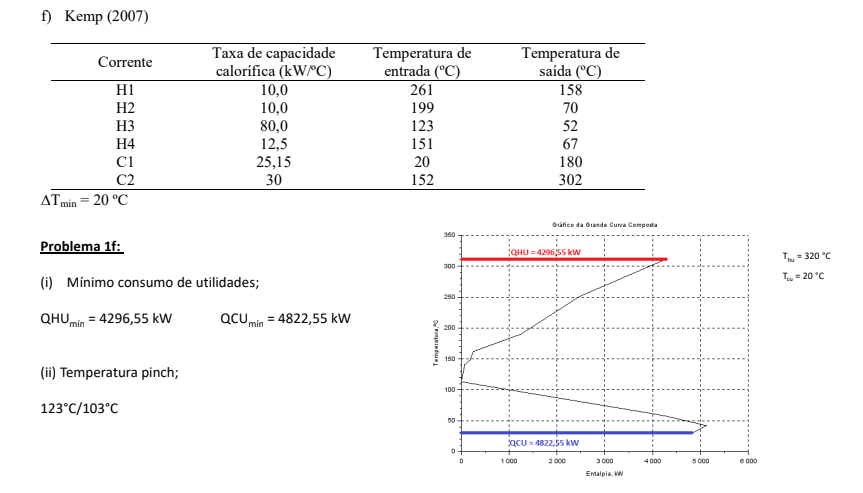

# **Cálculos para minimo consumo de utilidades e temperatura Pinch**

##**Criando um dataframe para as correntes quentes**

In [85]:
dados_h = pd.DataFrame((taxa_cp_h,t_entrada_h,t_saida_h),columns=nome_linha_h,index=["cp","Ti","To"]).T
dados_h

,cp,Ti,To
H1,1,250,120
H2,4,200,100


**Inserindo as variações de temperatura em relação ao approach**

In [86]:
dados_h["var t_entrada"] = t_entrada_h - app
dados_h["var t_saida"] = t_saida_h - app

In [87]:
dados_h

,cp,Ti,To,var t_entrada,var t_saida
H1,1,250,120,240,110
H2,4,200,100,190,90


##**Criando um dataframe para as correntes frias**

In [88]:
dados_c = pd.DataFrame((taxa_cp_c,t_entrada_c,t_saida_c),columns=nome_linha_c,index=["cp","Ti","To"]).T
dados_c

,cp,Ti,To
C1,3,90,150
C2,6,130,190


**Inserindo as variações de temperatura em relação ao approach**

In [89]:
dados_c["var t_entrada"] = t_entrada_c + app
dados_c["var t_saida"] = t_saida_c + app

In [90]:
dados_c

,cp,Ti,To,var t_entrada,var t_saida
C1,3,90,150,100,160
C2,6,130,190,140,200


##**Organizando as variações de temperatura em ordem decrescente**

Criando um dataframe com:

* As temperaturas de entrada de H e saída de H (maiores temperaturas naquela faixa).

* as temperatura de entrada variação de C e temperturas de saída + variação de C (maiores temperaturas da faixa).

**Passo 1: Criar uma lista com os valores das 4 colunas acima, as de interesse**

In [91]:
lhi = np.array((dados_h['Ti']))
lho = np.array((dados_h['To']))

lci_dt = np.array((dados_c['var t_entrada']))
lco_dt = np.array((dados_c['var t_saida']))

**Passo 2: Unindo tudo na lista**

In [92]:
lista_t = np.concatenate((lhi,lho,lci_dt,lco_dt))
lista_t

array([250, 200, 120, 100, 100, 140, 160, 200])

**Como cada nível é único, deve-se remover os níveis com valores repetidos**

In [93]:
lista_t = np.unique(lista_t)

**Passo 3: Organizando esse array em ordem decrescente de temperatura**

In [94]:
T_esquerda = np.sort(lista_t)[::-1]
T_esquerda

array([250, 200, 160, 140, 120, 100])

**Passo 4: Criando um dataframe com essas temperaturas**

In [95]:
dados_conjunto = pd.DataFrame(T_esquerda,columns=['T_esquerda'])

**Passo 5: Calculando a temperatura da direita a partir do approach definido**

In [96]:
dados_conjunto['T_direita'] = dados_conjunto['T_esquerda'] - app

**Visualizando os dados até o momento**

In [97]:
dados_conjunto

,T_esquerda,T_direita
0,250,240
1,200,190
2,160,150
3,140,130
4,120,110
5,100,90


##**Calculando o a carga térmica líquida de cada uma das seções**

###**Passo 1: Variação de temperatura em cada seção**

Usaremos o uma cópia do array do T_esquerda com o último valor deletado e outra cópia com o primeiro valor , assim poderemos subtrair os dois arrays e encontrar o delta T

In [98]:
T_esquerda

array([250, 200, 160, 140, 120, 100])

In [99]:
T1 = np.delete(T_esquerda,0) # apagamos o primeiro valor
T1

array([200, 160, 140, 120, 100])

In [100]:
T2= np.delete(T_esquerda,-1) # apagamos o último valor
T2

array([250, 200, 160, 140, 120])

**Gerando o array do delta T**

In [101]:
delta_T = T2-T1
delta_T

array([50, 40, 20, 20, 20])

Adicionando 0 no último valor para voltar ao número original de valores

In [102]:
delta_T = np.insert(delta_T,len(delta_T),0) # o segundo parâmetro é a posição de inserção
delta_T

array([50, 40, 20, 20, 20,  0])

**Inserindo a variação de temperatura**

In [103]:
dados_conjunto['delta T'] = delta_T
dados_conjunto

,T_esquerda,T_direita,delta T
0,250,240,50
1,200,190,40
2,160,150,20
3,140,130,20
4,120,110,20
5,100,90,0


###**Passo 2: Separar quais cp serão utilizados em cada uma das faixas de temperatura**

####**Aplicando as máscaras**

**Máscara Quente**

Na coluna H1, irei colocar em quais faixas o cp dela será aplicado.

Será criada uma mascara com as temperaturas que H1 passa

In [104]:
def mascara_quente(t_corrente,t_coluna_comparar):
  m_corrente = []
  for i in t_coluna_comparar:
    if i == t_corrente[0] or (i >= t_corrente[1] and i < t_corrente[0]):
      m_corrente.append(1)     # se verdadeiro, insere 1

    else:
      m_corrente.append(0)
  return m_corrente            # se falso, insere 0


**Aplicando a máscara nas correntes quentes -> Usa a T_esquerda**

In [105]:
k = 0 # contador

masc_quente = []

for i in t_entrada_h:
  t_H = np.array((i,t_saida_h[k]))
  m_H = mascara_quente(t_H,T_esquerda)

  masc_quente.append(m_H)

  k +=1

In [106]:
masc_quente = np.asarray(masc_quente)
masc_quente

array([[1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1]])

**Máscara Fria**

De forma semelhante, iremos criar uma função para fazer a máscara das correntes frias

In [107]:
def mascara_fria(t_corrente,t_coluna_comparar):
  m_corrente = []
  for i in t_coluna_comparar:
    if i == t_corrente[1] or (i >= t_corrente[0] and i < t_corrente[1]):
      m_corrente.append(1)     # se verdadeiro, insere 1

    else:
      m_corrente.append(0)
  return m_corrente            # se falso, insere 0

**Aplicando a máscara nas correntes frias -> Usa a T_direita**

In [108]:
T_direita = dados_conjunto['T_direita']

In [109]:
k = 0 # contador

masc_fria = []

for i in t_entrada_c:
  t_C = np.array((i,t_saida_c[k]))
  m_C = mascara_fria(t_C,T_direita)

  masc_fria.append(m_C)

  k +=1

In [110]:
masc_fria = np.asarray(masc_fria)
masc_fria

array([[0, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0]])

####**Aplicando o cp nos níveis em que serão aplicados**

Serão aplicados nos níveis em que existem os valores unitários e onde existe zero, irá passar

**Aplicando nas correntes quentes**

In [111]:
tx_cp_h = []
k = 0

for i in masc_quente:
  
  tx_cp_h.append(i*taxa_cp_h[k])
  k+=1

tx_cp_h

[array([1, 1, 1, 1, 1, 0]), array([0, 4, 4, 4, 4, 4])]

**Aplicando nas correntes frias**

In [112]:
tx_cp_c = []
k = 0

for i in masc_fria:
  
  tx_cp_c.append(i*taxa_cp_c[k])
  k+=1

tx_cp_c

[array([0, 0, 3, 3, 3, 3]), array([0, 6, 6, 6, 0, 0])]

###**Passo 3: Criar uma coluna no dataframe para cada uma dessas taxas calculadas**

Somente para fins visuais, não é realmente necessário inserir no dataframe

In [113]:
# dados_conjunto['tx_cp_H1'] = tx_cp_h[0]
# dados_conjunto['tx_cp_H2'] = tx_cp_h[1]
# dados_conjunto['tx_cp_C1'] = tx_cp_c[0]
# dados_conjunto['tx_cp_C2'] = tx_cp_c[1]

In [114]:
dados_conjunto

,T_esquerda,T_direita,delta T
0,250,240,50
1,200,190,40
2,160,150,20
3,140,130,20
4,120,110,20
5,100,90,0


###**Passo 3: Criar uma coluna com a carga térmica de cada seção**

**Para cada nível**

$Q_{liq} =\sum Cp_{quente} \cdot \Delta T - \sum Cp_{frio} \cdot \Delta T  $  

De forma que o cp será aplicado somente onde existe o valor na máscara

**Verificar quais níveis irão ser ativados para cada cp**

In [115]:
def ver_nivel(tx_cp):
  comp = len(tx_cp) - 1 # Faremos só até o penúltimo cp, pois o último é nulo

  k = 0

  cp = []

  while k!=comp:
    if (tx_cp[k] == tx_cp[k+1]) and tx_cp[k] !=0:
      cp.append(1)
    else:
      cp.append(0)
    k+=1

  cp.append(0)
  
  return cp

In [116]:
def calculo_Q(tx_cp_c,tx_cp_h,delta_T,taxa_cp_c,taxa_cp_h): # contém os vetores de todas as correntes frias e quentes

  # somatório dos cps da corrente fria
  C_novo = list(map(ver_nivel, tx_cp_c)) # transformando todos os vetores de corrente fria

  # somatório dos cps da corrente quente
  H_novo = list(map(ver_nivel, tx_cp_h)) # transformando todos os vetores de corrente quente
  
  # Calculando a carga térmica líquida das correntes frias
  nC = len(tx_cp_c) 
  n1 = 0
  Qc = []
  while n1!=nC:
    Qc.append(delta_T*np.array((C_novo[n1]))*np.array((taxa_cp_c[n1])))  
    n1+=1

  nH = len(tx_cp_h) 
  n2 = 0
  Qh = []
  while n2!=nH:
    Qh.append(delta_T*np.array((H_novo[n2]))*np.array((taxa_cp_h[n2])))  
    n2+=1
  
  #Qc = delta_T*C_novo

  # Calculando a carga térmica líquida das correntes quentes
  #Qh = delta_T*H_novo

  # Diferença entre quente e fria
  Q = sum(Qh) - sum(Qc) 

  return Q



In [117]:
Q_liq = calculo_Q(tx_cp_c,tx_cp_h,delta_T,taxa_cp_c,taxa_cp_h)
Q_liq

array([ 50, -40, -80,  40,  20,   0])

In [118]:

dados_conjunto['Q liq (kW)'] = Q_liq

In [119]:
dados_conjunto

,T_esquerda,T_direita,delta T,Q liq (kW)
0,250,240,50,50
1,200,190,40,-40
2,160,150,20,-80
3,140,130,20,40
4,120,110,20,20
5,100,90,0,0


Temos agora a carga térmica líquida de cada uma das faixas

##**Realizando o 1º cascateamento**

Necessário fazer a soma de um item ao próximo

In [120]:
def soma_cascateamento_1(Q_out):
  z = len(Q_out) - 1
  k = 1 # o primeiro permanece imutável

  while z > 0:
    Q_out[k] = Q_out[k] + Q_out[k - 1]
    z-=1
    k+=1
  
  return Q_out

In [121]:
Q_out_prov =  Q_liq# repetindo os valores do Q liq

In [122]:
Q_out = soma_cascateamento_1(Q_out_prov)

**Inserindo o resultado no dataframe**

In [123]:
dados_conjunto['Q_out_1_cascateamento'] = Q_out
dados_conjunto

,T_esquerda,T_direita,delta T,Q liq (kW),Q_out_1_cascateamento
0,250,240,50,50,50
1,200,190,40,-40,10
2,160,150,20,-80,-70
3,140,130,20,40,-30
4,120,110,20,20,-10
5,100,90,0,0,-10


##**Definindo a utilidade quente mínima a ser utilizada**

Vamos detectar o maior valor negativo, para este ser a valor da utilidade quente inicial

In [124]:
QHU_min = min(Q_out)*-1 # O valor deverá ser inserido de forma positiva
QHU_min # kW

70

##**Realizando o cascateamento definitivo**

Ao inserir o QHU_min logo no começo, teremos no final o valor da utilidade fria a ser utilizada e também poderemos definir a temperatura pinch

In [125]:
def soma_recascateamento(Q_liq,QHU_min):
  z = len(Q_liq) - 1

  Q_liq[0] = Q_liq[0] + QHU_min

  k = 1 # o primeiro permanece imutável

  while z > 0:
    Q_liq[k] = Q_liq[k] + Q_liq[k - 1]
    z-=1
    k+=1
  
  return Q_liq

***deverá ser feito com a carga térmica líquida original***

In [126]:
Q_liq_p = calculo_Q(tx_cp_c,tx_cp_h,delta_T,taxa_cp_c,taxa_cp_h)

In [127]:
Q_out_final = soma_recascateamento(Q_liq_p,QHU_min) 

**Inserindo o valor no Dataframe**

In [128]:
dados_conjunto['Q_out_final'] = Q_out_final

In [129]:
dados_conjunto

,T_esquerda,T_direita,delta T,Q liq (kW),Q_out_1_cascateamento,Q_out_final
0,250,240,50,50,50,120
1,200,190,40,-40,10,80
2,160,150,20,-80,-70,0
3,140,130,20,40,-30,40
4,120,110,20,20,-10,60
5,100,90,0,0,-10,60


##**Definindo a utilidade fria mínima a ser utilizada**

Como comentado previamente, será o valor final do cascateamento final

In [130]:
QCU_min = Q_out_final[-1]
QCU_min # kW

60

##**Temperatura Pinch**

A temperatura pinch é a temperatura em que o a carga térmica após o cascateamento é nula, da forma como esse script foi escrito, a temperatura pinch será o nível logo abaixo de onde zera

In [131]:
dados_conjunto

,T_esquerda,T_direita,delta T,Q liq (kW),Q_out_1_cascateamento,Q_out_final
0,250,240,50,50,50,120
1,200,190,40,-40,10,80
2,160,150,20,-80,-70,0
3,140,130,20,40,-30,40
4,120,110,20,20,-10,60
5,100,90,0,0,-10,60


**Descobrindo a linha que contém o valor 0 ou próximo a zero**

Em alguns casos o valor pode ser da ordem de 1e-10 ou menor, próximo de zero

In [132]:
linha = dados_conjunto.index[dados_conjunto['Q_out_final']< 0.1].tolist() 
linha

[2]

**Indicando a próxima linha**

In [133]:
extra = [1]

In [134]:
linha_f = [sum(np.concatenate((linha,extra)))]

**Visualizando essa linha**

In [135]:
linha_visu = dados_conjunto.loc[linha_f]
linha_visu

,T_esquerda,T_direita,delta T,Q liq (kW),Q_out_1_cascateamento,Q_out_final
3,140,130,20,40,-30,40


**Agora de posse da localização, podemos facilmente descobrir as temperaturas da faixa do Pinch**

In [136]:
dados_conjunto['T_esquerda'].loc[linha_f].values[0]

140

In [137]:
T_pinch = [dados_conjunto['T_esquerda'].loc[linha_f].values[0],dados_conjunto['T_direita'].loc[linha_f].values[0]]
T_pinch # ºC

[140, 130]

##**Resultados obtidos obtidos para consumo mínimo**

**Utilidade quente de mínimo consumo**

In [138]:
QHU_min # kW

70

**Utilidade fria de mínimo consumo**

In [139]:
QCU_min # kW

60

**Temperatura Pinch**

In [140]:
T_pinch # ºC

[140, 130]

#**Curvas Compostas**

##**Analisando a curva a quente**

Neste método, as seções da reta quente no mesmo patamar viram uma só, pois tem a mesma entalpia.

As seções para cálculo de Q serão divididas nas extremidades superior e inferior de cada reta e a temperatura será a temperatura de maior valor do nível.


In [141]:
dados_conjunto

,T_esquerda,T_direita,delta T,Q liq (kW),Q_out_1_cascateamento,Q_out_final
0,250,240,50,50,50,120
1,200,190,40,-40,10,80
2,160,150,20,-80,-70,0
3,140,130,20,40,-30,40
4,120,110,20,20,-10,60
5,100,90,0,0,-10,60


**Será necessário a remoção do último valor de cp no array de cada corrente**

In [142]:
def transf_quente(tx_cp_h): # tem que passar um array por vez
  # tirar o primeiro valor de cada vetor (da direita para a esquerda) -> esse valor será transformado em zero

# contar quantos valores diferente de zero existem no vetor

  k= 0
  for i in tx_cp_h:
    if i !=0:
      k+=1
    else:
      pass

# Descobrir a posição do último valor
  posicao = 0
  count = 0 # contar quantos valores já foram identificados
#while count!= k:
  for i in tx_cp_h: 
    if i !=0 and count!=k:
      posicao+=1 
      count+=1
    if i ==0 and count!=k:
      posicao+=1

  tx_cp_h_novo = np.copy(tx_cp_h)
# Tranformando esse valor em zero
  tx_cp_h_novo[posicao - 1]=0 # -1 por causa da sintaxe do python
  
  return tx_cp_h_novo

In [143]:
def curva_quente(tx_cp_h,T_esquerda,delta_T):
  # tranformando os vetores na versão sem o último valor
  tx_h_novo = []
  for i in tx_cp_h:
    y = transf_quente(i)
    tx_h_novo.append(y)

  # multiplicando os cp certos pelo delta T
  u = tx_h_novo*delta_T
  
  # Fazendo o somatório por nível
  soma = sum(u)

  # somando os itens da direita para a esquerda
  w = sum(u) # mudando o nome do vetor para que ele seja alterado depois
  c = len(soma) + 1 # 6 + 1 -> para a indexação no -r

  r = 2 # contará o número de valores alterados, começa com 2 pq o último ficará inalterado

  while r!= c: 
    w[-r] = w[-r] + w[-r+1]
    r+=1

  return w # vetor com as cargas acumuladas

In [144]:
valor_quente = curva_quente(tx_cp_h,T_esquerda,delta_T)
valor_quente

array([530, 480, 280, 180,  80,   0])

**Plotando o gráfico com a curva quente**

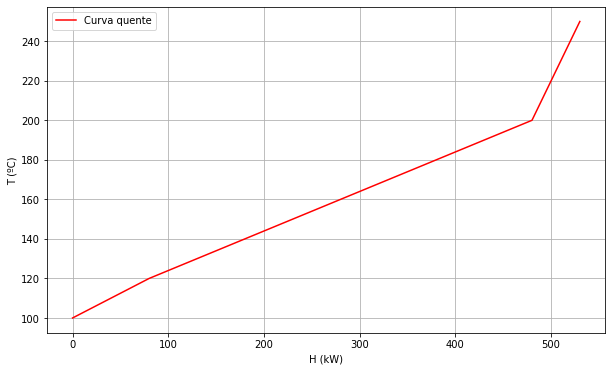

In [145]:
fig1, ax1 = plt.subplots(figsize =(10,6))
ax1.plot(valor_quente,T_esquerda,label='Curva quente',color="red")
# Adicionando texto nos eixos - descrição
ax1.set_xlabel('H (kW)')
ax1.set_ylabel('T (ºC)')
ax1.grid()
ax1.legend()

##**Analisando a curva a frio**

Será feita de forma similar, mas usaremos a menor temperatura no nível (temperatura direita)

**Podemos usar a mesma equação criada para a curva quente**

In [146]:
valor_frio = curva_quente(tx_cp_c,T_direita,delta_T)
valor_frio

array([540, 540, 300, 120,  60,   0])

**Para a curva a frio será necessário remover o primeiro conjunto de pontos gerado na equação da curva quente**

Remoção feita na hora de gerar o gráfico utilizando [1: ]

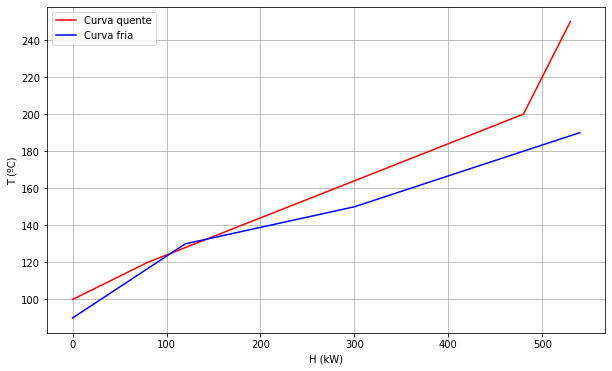

In [147]:
fig2, ax2 = plt.subplots(figsize =(10,6))
ax2.plot(valor_quente,T_esquerda,label='Curva quente',color="red")
ax2.plot(valor_frio[1:],T_direita[1:],label='Curva fria',color="blue")
# Adicionando texto nos eixos - descrição
ax2.set_xlabel('H (kW)')
ax2.set_ylabel('T (ºC)')
ax2.grid()
ax2.legend()

##**Curva Composta**

**É necessário adicionar o aproach min para separar as retas, uma vez que em uma situação real um equilíbrio de temperaturas não permite que o processo continue de forma espontânea**

Para esse approach mínimo, iremos somar a utilidade fria mínima na reta fria

Text(0.5, 1.0, 'Curva Composta')

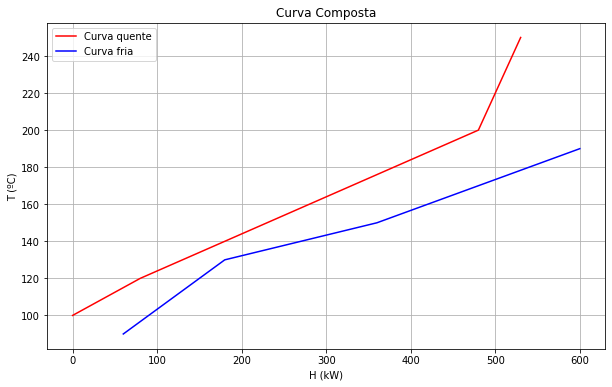

In [148]:
fig3, ax3 = plt.subplots(figsize =(10,6))
ax3.plot(valor_quente,T_esquerda,label='Curva quente',color="red")
ax3.plot(valor_frio[1:] + QCU_min,T_direita[1:],label='Curva fria',color="blue")
# Adicionando texto nos eixos - descrição
ax3.set_xlabel('H (kW)')
ax3.set_ylabel('T (ºC)')
ax3.grid()
ax3.legend()
ax3.set_title('Curva Composta')

##**Grande Curva Composta**

In [149]:
dados_conjunto

,T_esquerda,T_direita,delta T,Q liq (kW),Q_out_1_cascateamento,Q_out_final
0,250,240,50,50,50,120
1,200,190,40,-40,10,80
2,160,150,20,-80,-70,0
3,140,130,20,40,-30,40
4,120,110,20,20,-10,60
5,100,90,0,0,-10,60


**A grande curva composta será gerada com os valores de utilidade quente, seguida da carga termica final após o cascateamento energético**

In [150]:
H_compost = np.concatenate((np.array(([QHU_min])),Q_out_final))
H_compost

array([ 70, 120,  80,   0,  40,  60,  60])

**A temperatura de pinch associada a esse gráfico estará na média do patamar dela**

In [151]:
T_composta = np.array(((T_esquerda+T_direita)/2))
T_composta

array([245., 195., 155., 135., 115.,  95.])

**Gerando a grande curva composta**

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Grande Curva Composta')

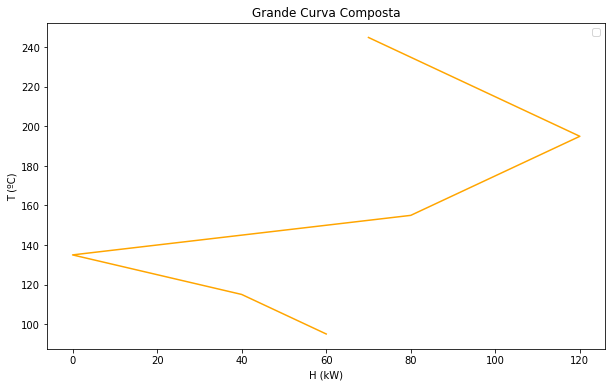

In [152]:
fig4, ax4 = plt.subplots(figsize =(10,6))
ax4.plot(H_compost[:-1],T_composta,color="orange")
# Adicionando texto nos eixos - descrição
ax4.set_xlabel('H (kW)')
ax4.set_ylabel('T (ºC)')
#ax4.grid()
ax4.legend()
ax4.set_title('Grande Curva Composta')

#**Resultados compilados**

**Utilidade quente de mínimo consumo**

In [153]:
QHU_min # kW

70

**Utilidade fria de mínimo consumo**

In [154]:
QCU_min # kW

60

**Temperatura Pinch**

In [155]:
T_pinch # ºC

[140, 130]

In [156]:
dados_conjunto

,T_esquerda,T_direita,delta T,Q liq (kW),Q_out_1_cascateamento,Q_out_final
0,250,240,50,50,50,120
1,200,190,40,-40,10,80
2,160,150,20,-80,-70,0
3,140,130,20,40,-30,40
4,120,110,20,20,-10,60
5,100,90,0,0,-10,60


**Curva Composta**

Text(0.5, 1.0, 'Curva Composta')

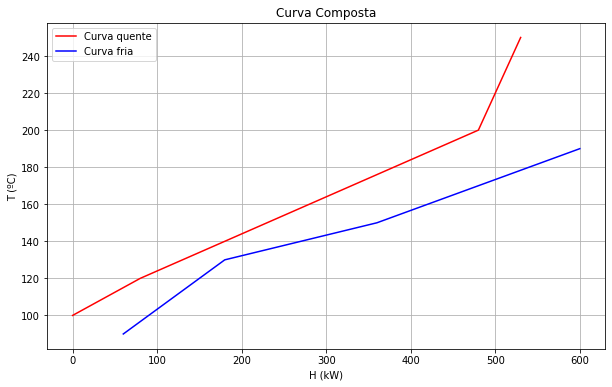

In [157]:
fig3, ax3 = plt.subplots(figsize =(10,6))
ax3.plot(valor_quente,T_esquerda,label='Curva quente',color="red")
ax3.plot(valor_frio[1:] + QCU_min,T_direita[1:],label='Curva fria',color="blue")
# Adicionando texto nos eixos - descrição
ax3.set_xlabel('H (kW)')
ax3.set_ylabel('T (ºC)')
ax3.grid()
ax3.legend()
ax3.set_title('Curva Composta')

**Grande curva composta**

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Grande Curva Composta')

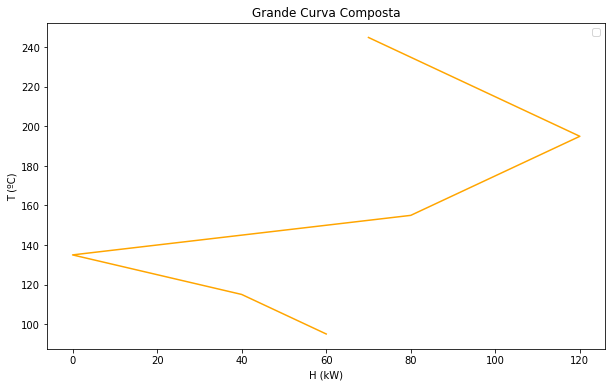

In [158]:
fig4, ax4 = plt.subplots(figsize =(10,6))
ax4.plot(H_compost[:-1],T_composta,color="orange")
# Adicionando texto nos eixos - descrição
ax4.set_xlabel('H (kW)')
ax4.set_ylabel('T (ºC)')
#ax4.grid()
ax4.legend()
ax4.set_title('Grande Curva Composta')